<h2>Dataframe matplotlib-grafiikaksi - perusasiat</h2>

<ul><li>Jos teen kaavion suoraan dataframesta (df.plot...), niin käytän pandas-kirjaston matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
    <br>Lue lisää <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a></li>
<li>matplotlib.pyplot sisältää komentoja kaavion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
    <br>Lue lisää <a href="https://matplotlib.org/tutorials/introductory/pyplot.html" target="_blank">https://matplotlib.org/tutorials/introductory/pyplot.html</a></li>
    <li>Vannoutuneet olio-ohjelmoijat käyttävät mieluummin kaavion luonnin palauttamaa <b>axes</b>-luokan oliota kaavion muotoiluun.
    <br>Lue lisää <a href="https://matplotlib.org/api/axes_api.html" target="_blank">https://matplotlib.org/api/axes_api.html</a></li></ul>
    
Seuraavassa teen kaaviot suoraan dataframesta ja käytän muotoiluun axes-oliota.

In [1]:
#tuon kirjastot
import pandas as pd
import matplotlib.pyplot as plt

#seuraavan ansiosta kaaviot tulostuvat Jupyter-notebookiin ilman erillistä komentoa
%matplotlib inline

In [2]:
#luon dataframen dictionarysta
df1 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230]})

#lisään kaupungit dataframen indeksiin
df1.index = ['Helsinki', 'Turku', 'Tampere', 'Oulu']

df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


<h3>Dataframesta kaavioksi</h3>

- <b>df.plot()</b> luo viivakaavion
- Muita kaaviolajeja <b>df.plot.bar(), df.plot.barh(), df.plot.hist(), df.plot.scatter(), df.boxplot()</b>
- Jos aiot muotoilla kaaviota, niin sijoita se muuttujaan. Kaavion luonti palauttaa axes-luokan olion.

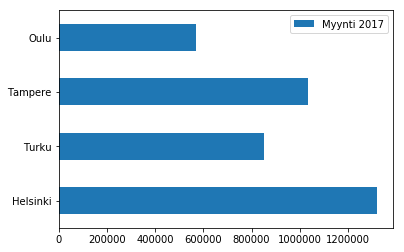

In [3]:
#myynnit vaakapylväskaaviona
df1.plot.barh()

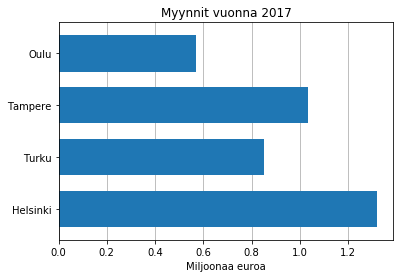

In [4]:
#pientä tuunausta kaavion luonnin yhteyteen (selite piiloon, pylvään leveyden määritys)
ax1 = df1.plot.barh(legend=False, width=0.7)

#otsikoita
ax1.set(title='Myynnit vuonna 2017', xlabel='Miljoonaa euroa')

#haen x-akselin ticksit ja muotoilen miljooniksi yhdellä desimaalilla
ax1.set_xticklabels(['{:.1f}'.format(x/1000000) for x in ax1.get_xticks()])

#taustaviivoitus x-akselin mukaan
ax1.grid(axis='x')

#taustaviivoitus pylväiden taakse
ax1.set_axisbelow(True)

In [5]:
#teen uuden dataframen
df2 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230],
       'Myynti 2016': [1203434, 923450, 1023563, 542399]})

df2.index = ['Helsinki', 'Turku', 'Tampere', 'Oulu']

df2

,Myynti 2017,Myynti 2016
Helsinki,1321847,1203434
Turku,852669,923450
Tampere,1032199,1023563
Oulu,568230,542399


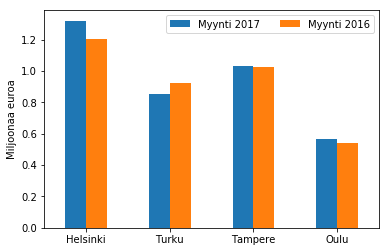

In [6]:
#vaaka-akselin nimiöiden kääntö kaavion luonnin yhteydessä
ax2 = df2.plot.bar(rot=0)

#y-akselin otsikko
ax2.set(ylabel='Miljoonaa euroa')

#haen y-akselin ticksit ja muotoilen miljooniksi yhdellä desimaalilla
ax2.set_yticklabels(['{:.1f}'.format(y/1000000) for y in ax2.get_yticks()])

#selitteeseen 2 saraketta (selitteet vierekkäin)
ax2.legend(ncol=2)

[Text(0, 0.5, 'Euroa'),
 Text(0.5, 0, 'Alue'),
 Text(0.5, 1.0, 'Myynti vuosina 2016 ja 2017')]

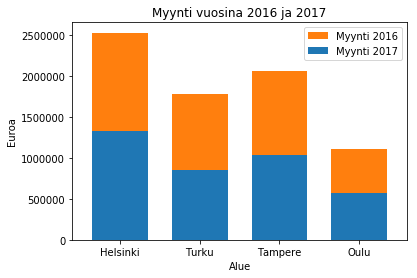

In [7]:
#stacked=True pinoaa pylväät päällekkäin
#legend='reverse' kääntää selitteen järjestyksen
ax3 = df2.plot.bar(rot=0, stacked=True, legend='reverse', width=0.7)

#otsikoinnit
ax3.set(title='Myynti vuosina 2016 ja 2017', xlabel='Alue', ylabel='Euroa')

In [8]:
#teen uuden dataframen
df3 = pd.DataFrame({'Mies':[17,15,6],'Nainen':[8,15,21]})
df3.index = ['Tyytymätön','Ei tyytymätön eikä tyytyväinen','Tyytyväinen']
df3

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


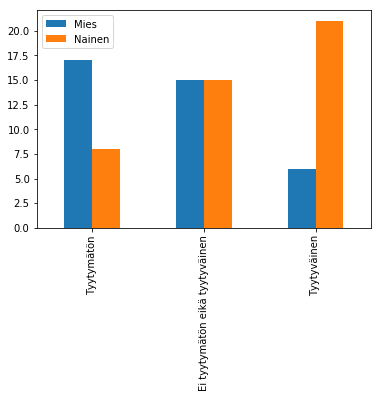

In [9]:
#kaavio ilman tuunausta
df3.plot.bar()

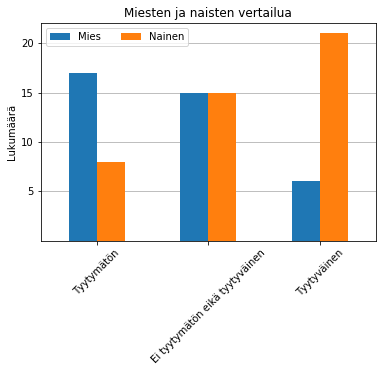

In [10]:
#rot kääntää x-akselin nimiöt 45 asteen kulmaan
ax4 = df3.plot.bar(rot=45)

ax4.set(title='Miesten ja naisten vertailua', ylabel='Lukumäärä')

#asetan y-akselin ticksit itse
ax4.set_yticks([5, 10, 15, 20])

#y-akselin mukainen taustaviivoitus
ax4.grid(axis='y')
ax4.set_axisbelow(True)

#selite kahteen sarakkeeseen
ax4.legend(ncol=2)

<h3>Usean kaavion kuviot</h3>

- Kaavio on aina <b>figure</b> (kuvio) -olion sisällä. 
- <b>Figure</b>-olion sisään voin sijoittaa useita kaavioita <b>plt.subplots()</b>-funktiolla
- <b>plt.subplots()</b> palauttaa <b>figure</b>-olion ja kokoelman <b>axes</b>-olioista.

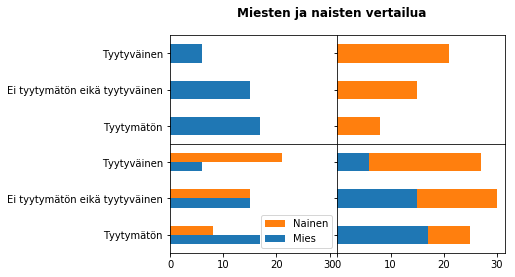

In [11]:
#2x2 kaaviomatriisi
#sharex- ja sharey-lisäparametreilla asetan yhteiset akselit
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

#figuren otsikko
fig.suptitle('Miesten ja naisten vertailua', fontsize=12, fontweight='bold')

#vasemman yläkulman kaavio
df3['Mies'].plot.barh(ax=axes[0,0])

#oikean yläkulman kaavio; värinä väripaletin toinen väri (C1)
df3['Nainen'].plot.barh(stacked=True, color='C1', ax=axes[0,1])

#vasemman alakulman kaavio
df3.plot.barh(legend='reverse',ax=axes[1,0])

#oikean alakulman kaavio
df3.plot.barh(legend=False, stacked=True, ax=axes[1,1])

#kaaviot kiinni toisiinsa
plt.subplots_adjust(wspace=0, hspace=0)

#tallennan kaavion
#ilman lisäparametria bbox_inches='tight' kaavion reunoilta voi jäädä osia tallentumatta
plt.gcf().savefig('testi.png', bbox_inches='tight')

In [12]:
#tällä selvitän tarjolla olevat kaavion tallennusmuodot (gcf=get current figure)
plt.gcf().canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

<h3>Valmiit tyylit</h3>

Valmista tyyliä käyttämällä saat nopeasti tuunattua grafiikan ulkoasua.

Tyylin voit ottaa käyttöön <b>plt.style.use('tyylin nimi')</b> -komennolla.

In [13]:
#tarjolla olevien tyylien listaus
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

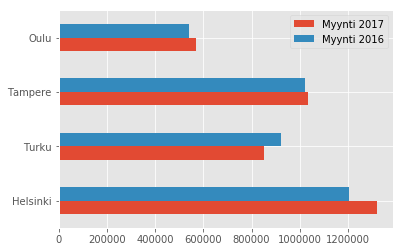

In [14]:
#esimerkkinä ggplot-tyyli
plt.style.use('ggplot')

df2.plot.barh()